In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf

In [2]:
df = pd.read_csv('/kaggle/input/west-kalimantan-mod21c3/data/training_validation_mod21c3.csv')
df.head()

,year,date,"[110.65896827426326, -3.0318140839033854]","[110.66795142710446, -3.0318140839033854]","[110.64998512142206, -3.02283093106219]","[110.65896827426326, -3.02283093106219]","[110.66795142710446, -3.02283093106219]","[110.67693457994565, -3.02283093106219]","[110.68591773278685, -3.02283093106219]","[110.64100196858087, -3.013847778220995]",...,"[109.62590569752581, 2.016717812848326]","[109.61692254468461, 2.025700965689521]","[109.62590569752581, 2.025700965689521]","[109.61692254468461, 2.0346841185307163]","[109.62590569752581, 2.0346841185307163]","[109.62590569752581, 2.0436672713719113]","[109.62590569752581, 2.0526504242131067]","[109.634888850367, 2.0526504242131067]","[109.634888850367, 2.0616335770543017]","[109.1048828327365, 2.070616729895497]"
0,2019,2019_01_01,307.06,307.06,304.88,307.06,307.06,307.06,307.06,304.88,...,303.44,303.44,303.44,303.44,303.44,303.44,303.980,303.980,303.980,302.48
1,2019,2019_02_01,308.28,308.28,306.64,308.28,308.28,308.28,308.28,306.64,...,297.28,297.28,297.28,297.28,297.28,297.28,303.980,303.980,303.980,302.96
2,2019,2019_03_01,307.98,307.98,306.94,307.98,307.98,307.98,307.98,306.94,...,306.88,306.88,306.88,306.88,306.88,306.88,303.980,303.980,303.980,305.38
3,2019,2019_04_01,308.26,308.26,306.78,308.26,308.26,308.26,308.26,306.78,...,304.98,304.98,304.98,304.98,304.98,304.98,303.600,303.600,303.600,307.60
4,2019,2019_05_01,308.22,308.22,306.42,308.22,308.22,308.22,308.22,306.42,...,308.76,308.76,308.76,308.76,308.76,308.76,303.908,303.908,303.908,305.00


In [3]:
df = df.drop(columns=['year', 'date'])

In [4]:
df.head()

,"[110.65896827426326, -3.0318140839033854]","[110.66795142710446, -3.0318140839033854]","[110.64998512142206, -3.02283093106219]","[110.65896827426326, -3.02283093106219]","[110.66795142710446, -3.02283093106219]","[110.67693457994565, -3.02283093106219]","[110.68591773278685, -3.02283093106219]","[110.64100196858087, -3.013847778220995]","[110.64998512142206, -3.013847778220995]","[110.65896827426326, -3.013847778220995]",...,"[109.62590569752581, 2.016717812848326]","[109.61692254468461, 2.025700965689521]","[109.62590569752581, 2.025700965689521]","[109.61692254468461, 2.0346841185307163]","[109.62590569752581, 2.0346841185307163]","[109.62590569752581, 2.0436672713719113]","[109.62590569752581, 2.0526504242131067]","[109.634888850367, 2.0526504242131067]","[109.634888850367, 2.0616335770543017]","[109.1048828327365, 2.070616729895497]"
0,307.06,307.06,304.88,307.06,307.06,307.06,307.06,304.88,304.88,307.06,...,303.44,303.44,303.44,303.44,303.44,303.44,303.980,303.980,303.980,302.48
1,308.28,308.28,306.64,308.28,308.28,308.28,308.28,306.64,306.64,308.28,...,297.28,297.28,297.28,297.28,297.28,297.28,303.980,303.980,303.980,302.96
2,307.98,307.98,306.94,307.98,307.98,307.98,307.98,306.94,306.94,307.98,...,306.88,306.88,306.88,306.88,306.88,306.88,303.980,303.980,303.980,305.38
3,308.26,308.26,306.78,308.26,308.26,308.26,308.26,306.78,306.78,308.26,...,304.98,304.98,304.98,304.98,304.98,304.98,303.600,303.600,303.600,307.60
4,308.22,308.22,306.42,308.22,308.22,308.22,308.22,306.42,306.42,308.22,...,308.76,308.76,308.76,308.76,308.76,308.76,303.908,303.908,303.908,305.00


# Data Splitting

In [5]:
# Set the split ratio
split_ratio = 0.9
split_point = int(len(df) * split_ratio)

# Split the data
train_df = df.iloc[:split_point]
validation_df = df.iloc[split_point:]

In [6]:
# Sliding Window
def create_window(dataframe, window_size, slide_size):
    input_window_list = []
    label_window_list = []
    # Iterate over the columns
    for col in tqdm(dataframe.columns):
        # Iterate over the rows in the current column with a sliding window
        for row in range(0, len(dataframe[col]) - (window_size + slide_size) + 1):
            window_range = row + window_size
            
            input_window = dataframe[col].iloc[row:window_range]
            input_window_list.append(input_window)
            
            label_window = dataframe[col].iloc[window_range:window_range + slide_size]
            label_window_list.append(label_window)
    return input_window_list, label_window_list

In [7]:
window_size = 3
slide_size = 1

train_input_window, train_label_window = create_window(train_df, window_size, slide_size)
validation_input_window, validation_label_window = create_window(validation_df, window_size, slide_size)

100%|██████████| 147695/147695 [00:24<00:00, 5974.52it/s]


# Save Train and Validation Data

In [8]:
# with open('data/train_input_window.pkl', 'wb') as f:
#     pickle.dump(train_input_window, f)
#     
# with open('data/train_label_window.pkl', 'wb') as f:
#     pickle.dump(train_label_window, f)
#     
# with open('data/validation_input_window.pkl', 'wb') as f:
#     pickle.dump(validation_input_window, f)
#     
# with open('data/validation_label_window.pkl', 'wb') as f:
#     pickle.dump(validation_label_window, f)

In [9]:
# x_train, y_train = create_window(train_df, window_size, slide_size)
# x_val, y_val = create_window(validation_df, window_size, slide_size)

# Convert to Numpy Array and Reshape

In [10]:
x_train = np.array(train_input_window)
y_train = np.array(train_label_window)
x_val = np.array(validation_input_window)
y_val = np.array(validation_label_window)

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

In [12]:
x_train.shape[1:]

(3, 1)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, input_shape=(x_train.shape[1:]), return_sequences=True),
    tf.keras.layers.LSTM(4, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 4)           │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 4)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
184619/184619 ━━━━━━━━━━━━━━━━━━━━ 923s 5ms/step - loss: 13.9125 - root_mean_squared_error: 42.5555 - val_loss: 2.0410 - val_root_mean_squared_error: 2.5910
Epoch 2/10
184619/184619 ━━━━━━━━━━━━━━━━━━━━ 940s 5ms/step - loss: 1.8427 - root_mean_squared_error: 2.4020 - val_loss: 2.0506 - val_root_mean_squared_error: 2.6122
Epoch 3/10
184619/184619 ━━━━━━━━━━━━━━━━━━━━ 935s 5ms/step - loss: 1.8431 - root_mean_squared_error: 2.4007 - val_loss: 2.0413 - val_root_mean_squared_error: 2.5920
Epoch 4/10
184619/184619 ━━━━━━━━━━━━━━━━━━━━ 926s 5ms/step - loss: 1.8437 - root_mean_squared_error: 2.4025 - val_loss: 2.0511 - val_root_mean_squared_error: 2.6130
Epoch 5/10
184619/184619 ━━━━━━━━━━━━━━━━━━━━ 917s 5ms/step - loss: 1.8429 - root_mean_squared_error: 2.4006 - val_loss: 2.0408 - val_root_mean_squared_error: 2.5886
Epoch 6/10
184619/184619 ━━━━━━━━━━━━━━━━━━━━ 920s 5ms/step - loss: 1.8429 - root_mean_squared_error: 2.3999 - val_loss: 2.0410 - val_root_mean_squared_error: 2.5878
Ep

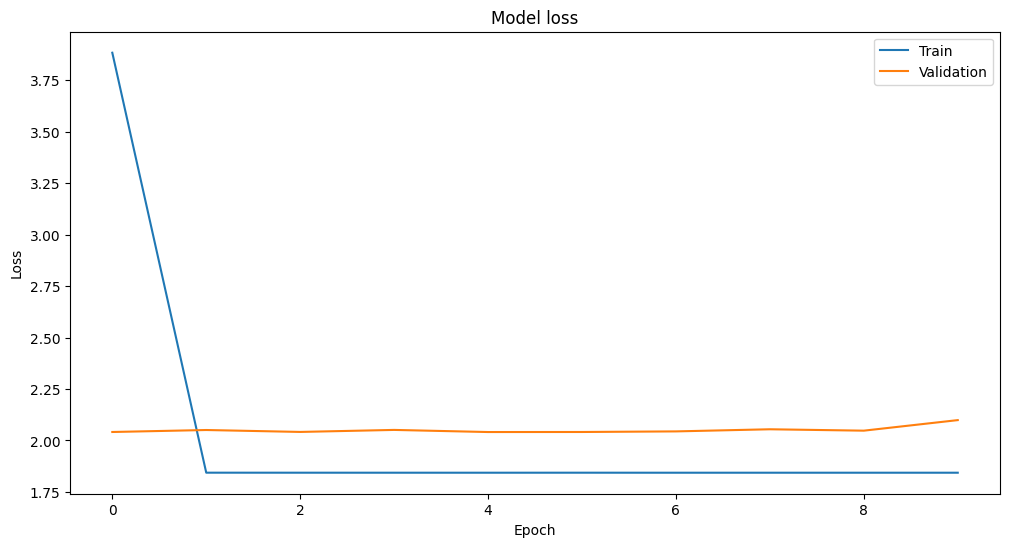

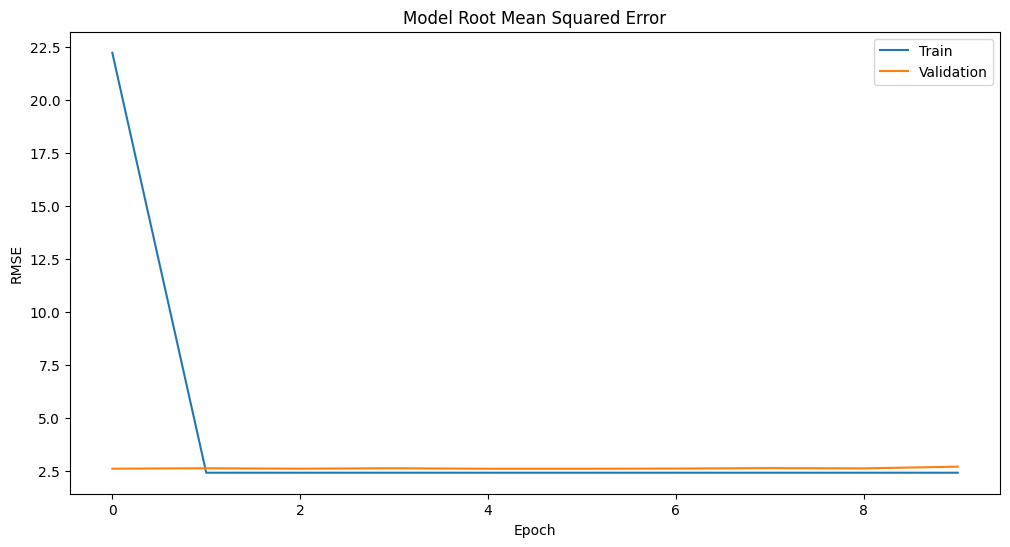

In [15]:
# TODO: plot loss and metrics

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation RMSE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
# save model
model.save('/kaggle/working/model.keras')

In [17]:
# TODO: try with different model configuration